# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
import multiprocessing as mp
from torch.distributions import Normal
import torch.nn.functional as F
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name='/home/frank/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux/Tennis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from PPOAgent1 import PPO_Agent
GAMMA = .99
LAMBDA = .96
Epsilon = 0.2
TMAX=1000
MINI_BATCH = 100
BATCH_SIZE  = 1000
OPT_EPOCHS=6

In [6]:
agent = PPO_Agent(24, 2,2,2,BATCH_SIZE,MINI_BATCH,GAMMA,LAMBDA,TMAX,OPT_EPOCHS,Epsilon)

Episode 100	Average Score: 0.02	 Score:0.0	 Max Score: 0.1   Min Score: -0.01
Episode 200	Average Score: 0.02	 Score:0.1	 Max Score: 0.2   Min Score: -0.011
Episode 300	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 400	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 500	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 600	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 700	Average Score: 0.03	 Score:0.1	 Max Score: 0.2   Min Score: -0.011
Episode 800	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 900	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.011
Episode 1000	Average Score: 0.02	 Score:0.1	 Max Score: 0.2   Min Score: -0.02
Episode 1100	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.022
Episode 1200	Average Score: 0.02	 Score:0.0	 Max Score: 0.2   Min Score: -0.022
Episode 1300	Average Score: 0.02	 Score:0.0	 Max Sc

Episode 10300	Average Score: 0.08	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 10400	Average Score: 0.08	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 10500	Average Score: 0.08	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 10600	Average Score: 0.08	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 10700	Average Score: 0.09	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 10800	Average Score: 0.08	 Score:0.09	 Max Score: 0.3   Min Score: -0.02
Episode 10900	Average Score: 0.08	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 11000	Average Score: 0.09	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 11100	Average Score: 0.08	 Score:0.0	 Max Score: 0.3   Min Score: -0.022
Episode 11200	Average Score: 0.08	 Score:0.0	 Max Score: 0.3   Min Score: -0.022
Episode 11300	Average Score: 0.10	 Score:0.1	 Max Score: 0.3   Min Score: -0.022
Episode 11400	Average Score: 0.09	 Score:0.09	 Max Score: 0.3   Min Score: -0.02
Episode 11500	Average Score:

Episode 20400	Average Score: 0.25	 Score:0.2	 Max Score: 1.3   Min Score: -0.022
Episode 20500	Average Score: 0.27	 Score:0.2	 Max Score: 1.3   Min Score: -0.022
Episode 20600	Average Score: 0.29	 Score:0.29	 Max Score: 1.6   Min Score: -0.02
Episode 20700	Average Score: 0.31	 Score:0.3	 Max Score: 2.1   Min Score: -0.022
Episode 20800	Average Score: 0.36	 Score:0.0	 Max Score: 2.1   Min Score: -0.022
Episode 20900	Average Score: 0.33	 Score:0.5	 Max Score: 2.3   Min Score: -0.022
Episode 21000	Average Score: 0.32	 Score:0.9	 Max Score: 2.3   Min Score: -0.022
Episode 21100	Average Score: 0.36	 Score:0.1	 Max Score: 2.3   Min Score: -0.022
Episode 21200	Average Score: 0.44	 Score:0.2	 Max Score: 2.6   Min Score: -0.022
Episode 21292	Average Score: 0.50	 Score:1.59	 Max Score: 2.6   Min Score: -0.02
Environment solved in 21192 episodes!	Average Score: 0.50


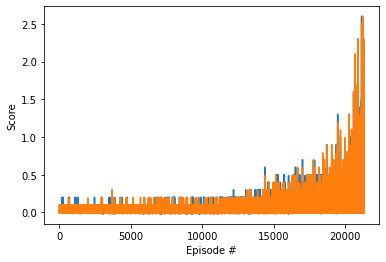

In [7]:
def TrainPPO(tmax,episodes = 100000):
    scores_list = []
    scores_window = deque(maxlen=100) 
    
    for e in range(1,episodes+1):
        
        env_info = env.reset(train_mode=True)[brain_name]
        scores = np.zeros(agent.n_actors)
        states = env_info.vector_observations  
        while True:
            states = torch.tensor(states, dtype=torch.float)
            dist = agent.policy_net.forward(states)
            actions = dist.sample()
            v_states=states.reshape(1,48)
            value = agent.value_target.forward(v_states)
            probs = dist.log_prob(actions).sum(dim=1)
            actions = np.clip(actions.cpu().detach().numpy(),-1,1)
            env_info = env.step(actions)[brain_name]
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states.cpu().detach().numpy(),v_states,actions,probs,value,rewards,dones)
            next_states = env_info.vector_observations
            scores += env_info.rewards
            states = next_states
            
            
            if np.any(dones):
                break
    
        max_score = np.max(scores)
        scores_window.append(max_score)
        scores_list.append(scores)

        
    
        print('\rEpisode {}\tAverage Score: {:.2f}\t Score:{}\t Max Score: {}   Min Score: {}'.format(e, np.mean(scores_window),np.round(max_score,5),np.round(np.max(scores_list),5),np.round(np.min(scores_list),5)) ,end="")
        if e % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(e, np.mean(scores_window)))
        if np.mean(scores_window)>=0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(e-100, np.mean(scores_window)))
            torch.save(agent.policy_net.state_dict(), 'PPOPolicycheckpoint.pth')
            torch.save(agent.value_target.state_dict(), 'PPOValuecheckpoint.pth')
            break
        
    
    return scores_list



            
            
                

scores = TrainPPO(TMAX)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
    

In [8]:
env.close()

In [9]:
env_info = env.reset(train_mode=True)[brain_name]
scores = np.zeros(agent.n_actors)
states = env_info.vector_observations  
for t in range(1):
    states = torch.tensor(states, dtype=torch.float)
    dist = agent.policy_net.forward(states)
    actions = dist.sample()
    v_states=states.reshape(1,48)
    value = agent.value_target.forward(v_states)
    probs = dist.log_prob(actions).sum(dim=1)
    actions = np.clip(actions.cpu().detach().numpy(),-1,1)
    env_info = env.step(actions)[brain_name]
    rewards = env_info.rewards
    dones = env_info.local_done
    agent.step(states.cpu().detach().numpy(),v_states,actions,probs,value,rewards,dones)
    next_states = env_info.vector_observations
    scores += env_info.rewards
    states = next_states


UnityEnvironmentException: No Unity environment is loaded.